# Wine Quality Visualization

## Introduction:
* In the winemaking industry, the quality of wine is assessed through a series of physicochemical and sensory tests. Laboratory tests are often used to characterize wine from numerous aspects, while sensory tests are performed by human experts, relying on human senses. Human analysis can be a final test for the ultimate quality of a wine. Physicochemical and sensory analysis are complex and are still not fully understood, however, it may be reasonable to hypothesize that physicochemical properties have an impact on human judgment.

* Collected from May 2004 to February 2007, this dataset, winequality-red.csv, is related to the red variant of the Portuguese “Vinho Verde” wine. The dataset contains ten physicochemical properties of red wine: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and alcohol. It also contains a human determined rating for quality for each sample, on a scale from (0-10)
 
With this project, we will try to answer the question: “Is the quality of wine affected by its acidity?”


## Preliminary exploratory data analysis:

### Reading the Libraries into JupyterHub

We will first start by loading the libraries we will be using in this proposal.

In [1]:
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
library(gridExtra)
library(GGally)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0  

### Loading Our Dataset into JupyterHub

Now that we have the libraries, we can start by loading our data into R and we will then add a column using mutate to show the number of rows. We then used select to put our new column as the first column.

In [2]:
dataset <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delim = ";") |>
           mutate(seq = seq(from = 1, to = 1599), na.rm = TRUE) |>
           select(13,1:12)
dataset

Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (12): fixed acidity, volatile acidity, citric acid, residual sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


seq,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1597,6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
1598,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5
1599,6.0,0.310,0.47,3.6,0.067,18,42,0.99549,3.39,0.66,11.0,6


### Wrangling

This data is very difficult to work with so we'll start cleaning and wrangling our dataset. We first start by selecting the columns we require using the select function, then we will provide better column names for each. 
Lastly, we are creating a categorical dataset below by adding a new column using mutate which tells us that:
* Quality < 5 is Low
* Quality of 5 is Average
* Quality of 6 is High
* Quality of > 6 is Very High

We will use as_factor() to make it a categorical variable

In [3]:
filtered_dataset <- dataset |>
                    select("seq", "fixed acidity", "volatile acidity", "citric acid", "residual sugar",
                           "chlorides", "free sulfur dioxide","total sulfur dioxide", "density", "pH", "sulphates",
                           "alcohol", "quality")
                           
                         
colnames(filtered_dataset) <- (c("seq", "fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar",
                           "chlorides", "free_sulfur_dioxide","total_sulfur_dioxide", "density", "pH", "sulphates",
                           "alcohol", "quality"))




categorical_dataset <- filtered_dataset |>
                       mutate(Grade = case_when(quality < 5 ~ "Low",
                                                quality == 5 ~ "Average", 
                                                quality == 6 ~ "High",
                                                quality > 6 ~ "Very High")) |>
                       mutate(Grade = as_factor(Grade)) |>
                        arrange(quality)

categorical_dataset
                                               





seq,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Grade
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
460,11.6,0.580,0.66,2.20,0.074,10,47,1.0008,3.25,0.57,9.0,3,Low
518,10.4,0.610,0.49,2.10,0.200,5,16,0.9994,3.16,0.63,8.4,3,Low
691,7.4,1.185,0.00,4.25,0.097,5,14,0.9966,3.63,0.54,10.7,3,Low
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1404,7.2,0.33,0.33,1.7,0.061,3,13,0.99600,3.23,1.10,10.0,8,Very High
1450,7.2,0.38,0.31,2.0,0.056,15,29,0.99472,3.23,0.76,11.3,8,Very High
1550,7.4,0.36,0.30,1.8,0.074,17,24,0.99419,3.24,0.70,11.4,8,Very High


## GGPairs


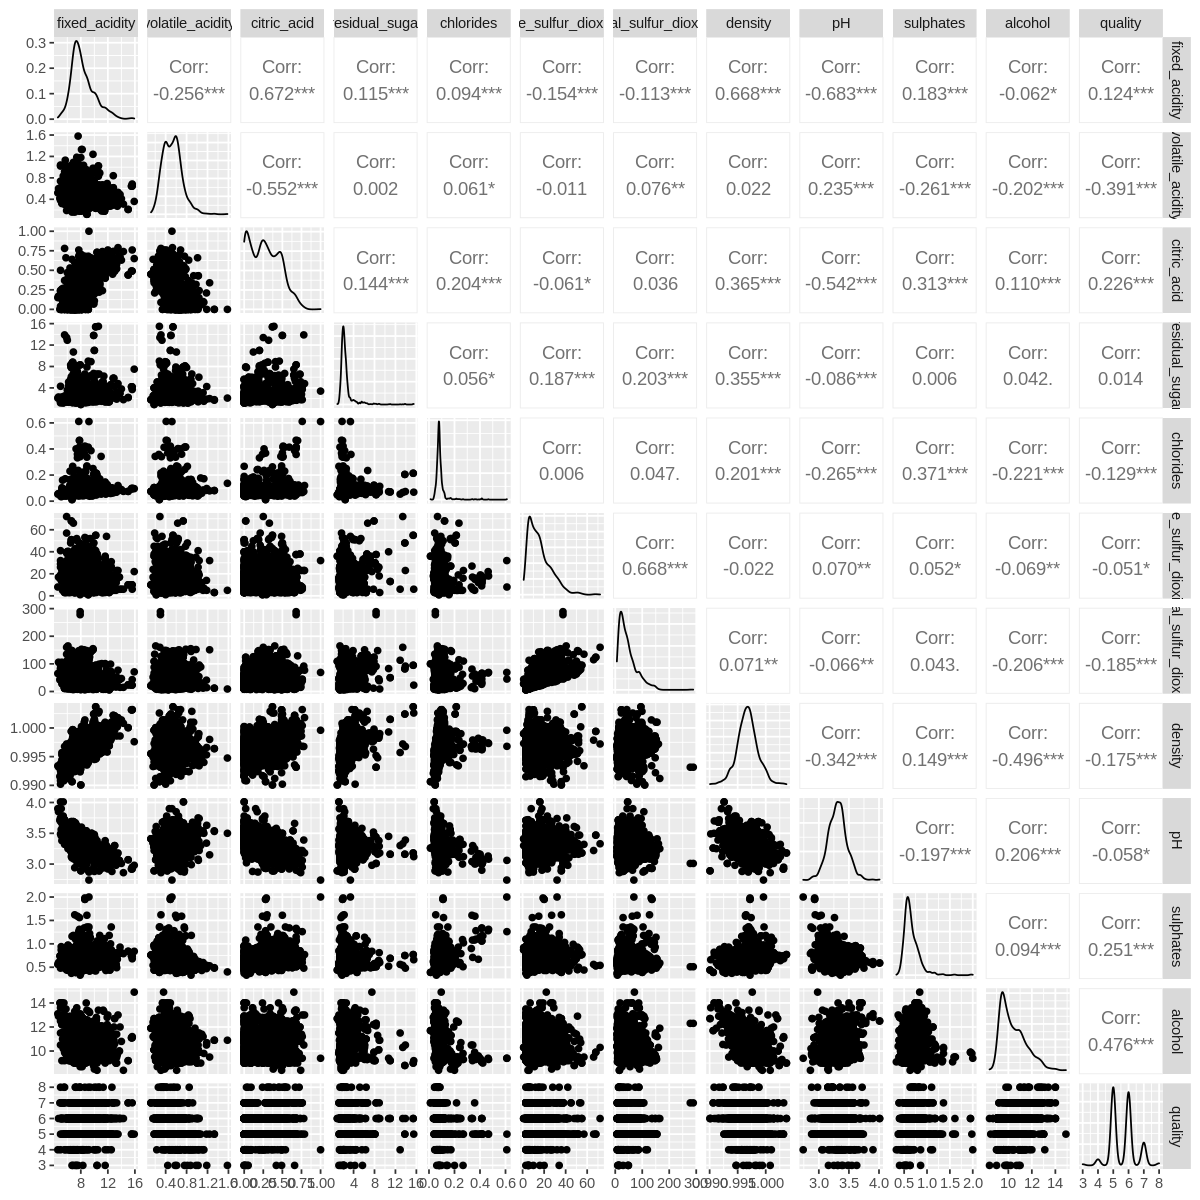

In [4]:
set.seed(1000)
options(repr.plot.width = 10, repr.plot.height = 10)

ggpairs(categorical_dataset, columns = 2:13) 

In the figure above, we can see that the variables with the largest correlaton to quality are volatile acidity and alcohol. However, we also need to check based on the p-value with the Pearson’s correlation test. 

For instance, the stars in the upper corner of the matrix indicate the significance. The more stars present, the more significant the relationship is. In order to be significant enough to the significance value (we use significance value (alpha) of 0.05), there needs to be at least one star present. 

In this p-value analysis, we are only interested in considering the p-values of the relationship between quality and each predictor variable. We can see that all variables have at least one star (meaning the p-value less than pre-determined alpha (i.e. 0.05)) with the exception of residual sugar. Therefore, we will omit residual.sugar as a variable in our analysis. 


In [5]:
Clean_wine_dataset <- categorical_dataset |>
                      select(-residual_sugar)
Clean_wine_dataset

seq,fixed_acidity,volatile_acidity,citric_acid,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Grade
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
460,11.6,0.580,0.66,0.074,10,47,1.0008,3.25,0.57,9.0,3,Low
518,10.4,0.610,0.49,0.200,5,16,0.9994,3.16,0.63,8.4,3,Low
691,7.4,1.185,0.00,0.097,5,14,0.9966,3.63,0.54,10.7,3,Low
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1404,7.2,0.33,0.33,0.061,3,13,0.99600,3.23,1.10,10.0,8,Very High
1450,7.2,0.38,0.31,0.056,15,29,0.99472,3.23,0.76,11.3,8,Very High
1550,7.4,0.36,0.30,0.074,17,24,0.99419,3.24,0.70,11.4,8,Very High


### Removing The Outliers

The data above will give us a plot which is very clustered and therefore will be difficult to classify. To solve this problem and provide a cleaner graph, we will remove the outliers from our data using the Inter Quantile method.

In [6]:
#find Q1, Q3, and interquartile range for values in column sulphates
Q1 <- quantile(Clean_wine_dataset$sulphates, .25)
Q3 <- quantile(Clean_wine_dataset$sulphates, .75)
IQR <- IQR(Clean_wine_dataset$sulphates)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
no_outliers <- subset(Clean_wine_dataset, Clean_wine_dataset$sulphates> (Q1 - 1.5*IQR) 
                      & Clean_wine_dataset$sulphates< (Q3 + 1.5*IQR))

#view row and column count of new data frame
dim(no_outliers) 


#find Q4, Q6, and interquartile range for values in column citric_acid
Q4 <- quantile(no_outliers$citric_acid, .25)
Q6 <- quantile(no_outliers$citric_acid, .75)
IQR <- IQR(no_outliers$citric_acid)

#only keep rows in dataframe that have values within 1.5*IQR of Q4 and Q6
no_outliers_2 <- subset(no_outliers, no_outliers$citric_acid> (Q4 - 1.5*IQR) 
                      & no_outliers$citric_acid< (Q6 + 1.5*IQR))

#view row and column count of new data frame
dim(no_outliers_2) 

#find Q7, Q9, and interquartile range for values in column volatile_acidity
Q7 <- quantile(no_outliers_2$volatile_acidity, .25)
Q9 <- quantile(no_outliers_2$volatile_acidity, .75)
IQR <- IQR(no_outliers_2$volatile_acidity)

#only keep rows in dataframe that have values within 1.5*IQR of Q7 and Q9
no_outliers_3 <- subset(no_outliers_2, no_outliers_2$volatile_acidity> (Q7 - 1.5*IQR) 
                     & no_outliers_2$volatile_acidity< (Q9 + 1.5*IQR))

#view row and column count of new data frame
dim(no_outliers_3) 


#find Q11, Q13, and interquartile range for values in column alcohol
Q11 <- quantile(no_outliers_3$alcohol, .25)
Q13 <- quantile(no_outliers_3$alcohol, .75)
IQR <- IQR(no_outliers_3$alcohol)

#only keep rows in dataframe that have values within 1.5*IQR of Q11 and Q13
no_outliers_4 <- subset(no_outliers_3, no_outliers_3$alcohol> (Q11 - 1.5*IQR) 
                     & no_outliers_3$alcohol< (Q13 + 1.5*IQR))

#view row and column count of new data frame
dim(no_outliers_4) 


no_outliers_updated <- no_outliers_4 |>
                   select(-quality)

no_outliers_updated
           


[1] 1540   13

[1] 1540   13

[1] 1520   13

[1] 1506   13

seq,fixed_acidity,volatile_acidity,citric_acid,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,Grade
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
460,11.6,0.58,0.66,0.074,10,47,1.00080,3.25,0.57,9.0,Low
518,10.4,0.61,0.49,0.200,5,16,0.99940,3.16,0.63,8.4,Low
833,10.4,0.44,0.42,0.145,34,48,0.99832,3.38,0.86,9.9,Low
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1203,8.6,0.42,0.39,0.068,6,12,0.99516,3.35,0.69,11.7,Very High
1450,7.2,0.38,0.31,0.056,15,29,0.99472,3.23,0.76,11.3,Very High
1550,7.4,0.36,0.30,0.074,17,24,0.99419,3.24,0.70,11.4,Very High


### Visualization       
Now that we have our tidy data and we are comparing two quantitative variables, we used a scatterplot. In addition, we put the color as Grade as it is the catergorical variable that we want to predict. We also added human readable axis labels.

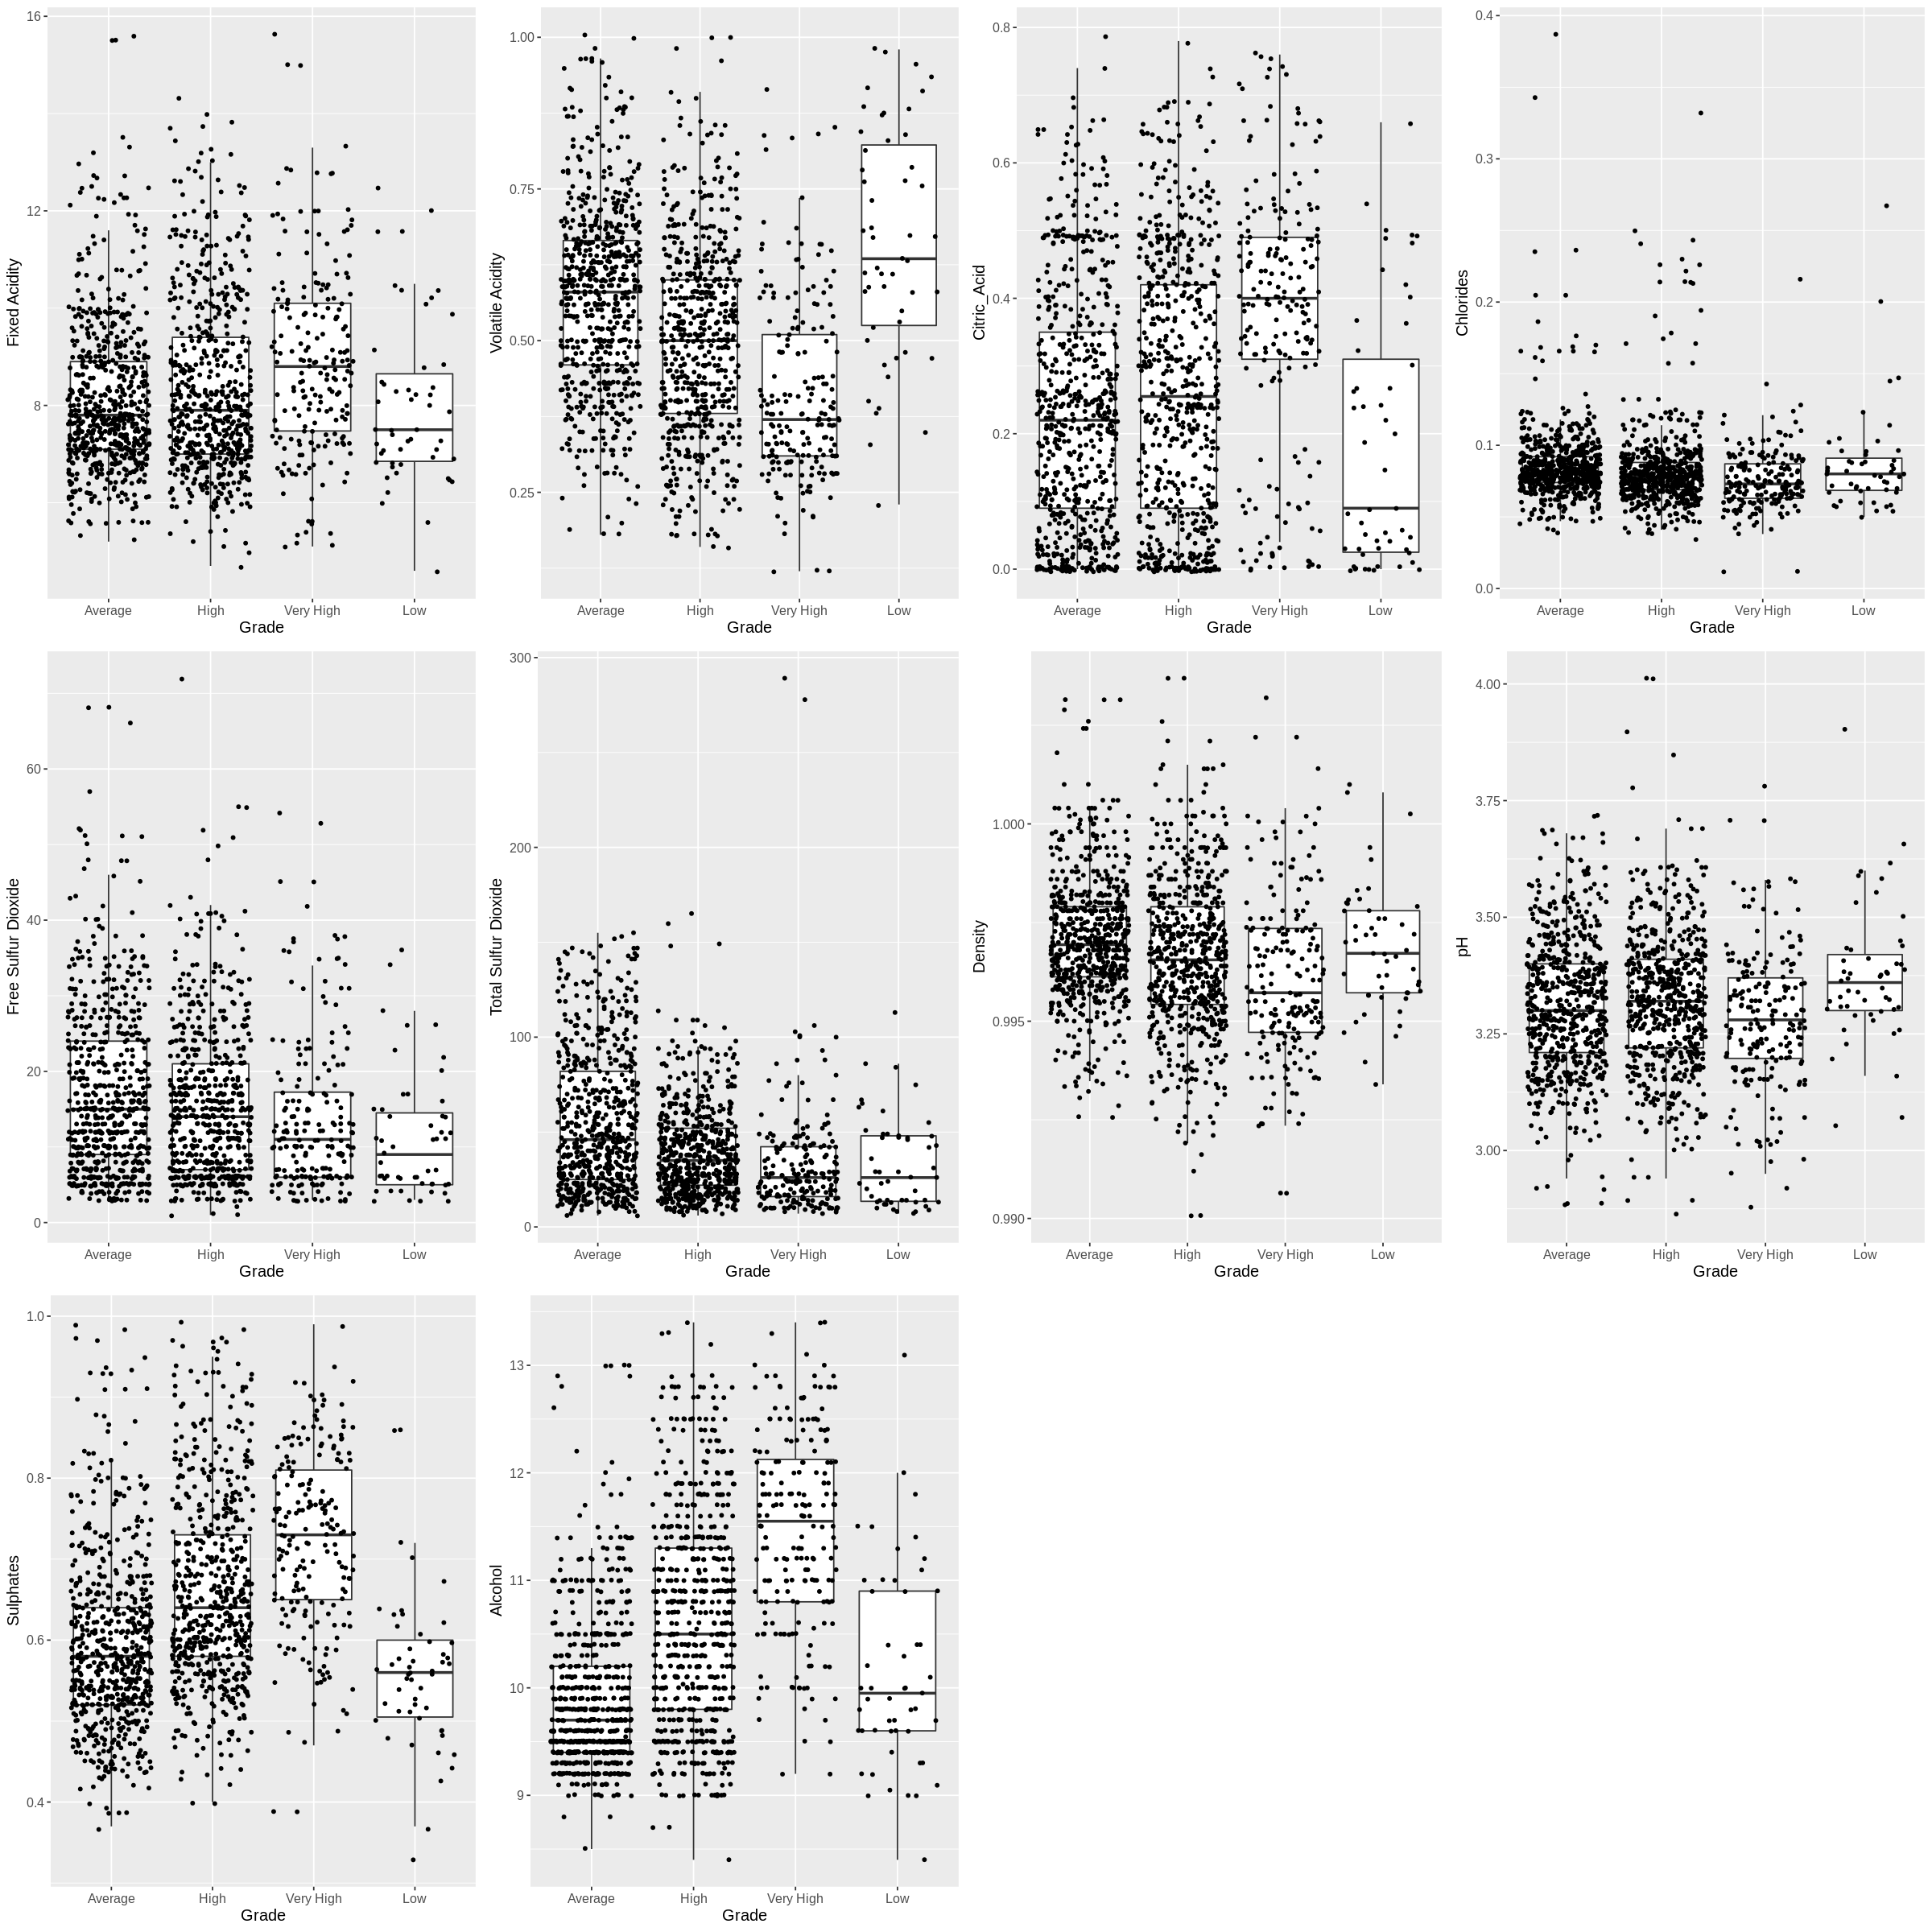

In [7]:
options(repr.plot.height = 20, repr.plot.width = 20)

boxplot_fixed_acidity <- no_outliers_updated |>
                         ggplot(aes(x = Grade, y = fixed_acidity)) +
                         geom_boxplot(outlier.shape = NA) +
                         geom_jitter(size = 1) +
                         labs(x = "Grade", y = "Fixed Acidity") +
                         theme(text = element_text(size = 12))


boxplot_volatile_acidity <- no_outliers_updated |>
                            ggplot(aes(x = Grade, y = volatile_acidity)) +
                            geom_boxplot(outlier.shape = NA) +
                            geom_jitter(size = 1) +
                            labs(x = "Grade", y = "Volatile Acidity") +
                            theme(text = element_text(size = 12))



boxplot_citric_acid <- no_outliers_updated |>
                       ggplot(aes(x = Grade, y = citric_acid)) +
                       geom_boxplot(outlier.shape = NA) +
                       geom_jitter(size = 1) +
                       labs(x = "Grade", y = "Citric_Acid") +
                       theme(text = element_text(size = 12))


boxplot_chlorides <- no_outliers_updated |>
                     ggplot(aes(x = Grade, y = chlorides)) +
                     geom_boxplot(outlier.shape = NA) +
                     geom_jitter(size = 1) +
                     labs(x = "Grade", y = "Chlorides") +
                     theme(text = element_text(size = 12))


boxplot_free_sulfur_dioxide <- no_outliers_updated |>
                               ggplot(aes(x = Grade, y = free_sulfur_dioxide)) +
                               geom_boxplot(outlier.shape = NA) +
                               geom_jitter(size = 1) +
                               labs(x = "Grade", y = "Free Sulfur Dioxide") +
                               theme(text = element_text(size = 12))
                            


boxplot_total_sulfur_dioxide <- no_outliers_updated |>
                                ggplot(aes(x = Grade, y = total_sulfur_dioxide)) +
                                geom_boxplot(outlier.shape = NA) +
                                geom_jitter(size = 1) +
                                labs(x = "Grade", y = "Total Sulfur Dioxide") +
                                theme(text = element_text(size = 12))


boxplot_density <- no_outliers_updated |>
                   ggplot(aes(x = Grade, y = density)) +
                   geom_boxplot(outlier.shape = NA) +
                   geom_jitter(size = 1) +
                   labs(x = "Grade", y = "Density") +
                   theme(text = element_text(size = 12))


boxplot_pH <- no_outliers_updated |>
              ggplot(aes(x = Grade, y = pH)) +
              geom_boxplot(outlier.shape = NA) +
              geom_jitter(size = 1) +
              labs(x = "Grade", y = "pH") +
              theme(text = element_text(size = 12))


boxplot_sulphates <- no_outliers_updated |>
                     ggplot(aes(x = Grade, y = sulphates)) +
                     geom_boxplot(outlier.shape = NA) +
                     geom_jitter(size = 1) +
                     labs(x = "Grade", y = "Sulphates") +
                     theme(text = element_text(size = 12))



boxplot_alcohol <- no_outliers_updated |>
                   ggplot(aes(x = Grade, y = alcohol)) +
                   geom_boxplot(outlier.shape = NA) +
                   geom_jitter(size = 1) +
                   labs(x = "Grade", y = "Alcohol") +
                   theme(text = element_text(size = 12))


grid.arrange(boxplot_fixed_acidity,boxplot_volatile_acidity,boxplot_citric_acid,
             boxplot_chlorides,boxplot_free_sulfur_dioxide,boxplot_total_sulfur_dioxide,
             boxplot_density,boxplot_pH,boxplot_sulphates,boxplot_alcohol, ncol = 4)
                         

With the boxplots above, we can conclude that variables such as Citric Acid, Volatile Acid, Sulphates and Alcohol. However, the other variables has little to no correlaton towards Grade.

## Methods:
* We plan on answering our predictive question using a k-nearest neighbors classification model. We would generate a random point in the plot and observe its nearest neighbors to predict its Grade.
* We shall also standardize our variables to ensure fair comparison.
* Overall, since chapter 8 (regression II) has not been covered, we would decide after if regression fits our predictive question more than a classification model.

## Expected outcomes and significance:

### What do you expect to find?

We hypothesize red wines to have a pH ranging between 3.3 to 3.6 to be considered as good quality. High pH levels are susceptible to bacteria growth whereas low pH wines taste tart and crisp (Vinny, 2009). Moreover, high amounts of sulfur dioxide lead to unpleasant tastes and produce burning sensations when consumed. Therefore, we hypothesize the ideal level of sulfur dioxide to range around 25 mg/l for red wines.

 ### What impact could such findings have?

Health concerns associated with drinking include organ damage, sulfite reactions and weakened immune system (Sarkar, 2015) . In particular, sulfite reactions affect breathing, skin, and the digestive system depending on the consumer. These findings can link to the daily consumption of sulfur dioxides and the health effects associated with excessive intake of sulfur dioxide due to uncontrolled drinking. 

### What future questions could this lead to?

Future questions can explore the pH and sulfur dioxide levels of other types of wine or alcoholic beverages and compare the relative levels in specific types. Also, warmer temperatures transform the flavour of wine, posing future research in exploring the change of pH and sulfur dioxide levels in order to produce good quality wine.  

## Bibliography
 
* P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.


#### Splitting into Training and Testing Datasets

Our initial step is to set the seed for our data to be reproducible. In addition, we used the inital_split function to split our clean data set into 75% for training data and 25% for our testing dataset. wine_train is our training data and wine_test is our testign data.

In [8]:
set.seed(1000)
wine_split <- initial_split(no_outliers_updated, prop = 0.75, strata = Grade)
wine_train <- training(wine_split)
wine_test <- testing(wine_split)


#### Cross Validation

Next, we apply cross validation onto our training data and split it into 5 evenly distributed subsets. We then apply stratification to avoid an imbalance of our target variable in the subsets ultimately decreasing biased datasets.

In [9]:
wine_vfold <- vfold_cv(wine_train, v = 5, strata = Grade)

#### Creating the Classification Model

Now, let's create a classification model using these variables. We shall first create a model specification and set neighbors as tune() as we want to find the best neighbors that give the best accuracy estimate. After that, we shall create a recipe using  all predictors variables that has correlation towards Grade from the visualization above. We shall also step and center our data to standardize it.

In [10]:
wine_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

wine_recipe <- recipe(Grade ~ citric_acid + volatile_acidity + sulphates + alcohol, data = wine_train) |>
               step_scale(all_predictors()) |>
               step_center(all_predictors())

#### Finding the Best Neighbours

Next we use workflow to combine the recipe and model specification. Furthermore, we used tune_grid() as it fits the model for each value in a range of parameter values and we set the grid as 100 as we shall use 100 $K$ values for this model. We then aggregate the mean and standard error using the collect_metrics() function. We then filtered everything but the accuracy and arranged it from highest to lowest mean, slice the top row and found which neighbour gives the best accuracy. 12 in this case.

In [11]:
wine_fit <- workflow() |>
            add_recipe(wine_recipe) |>
            add_model(wine_spec) |>
            tune_grid(resamples = wine_vfold, grid = 100) |>
            collect_metrics() |>
            filter(.metric == "accuracy") |>
            arrange(desc(mean)) |>
            slice(1) |>
            pull(neighbors)

wine_fit

[1] 15

#### Creating a New Model Specification

Now, we shall set the neighbours as 12 in our new model specification as founded previously and we shall create another recipe.

In [12]:
wine_spec_test <- nearest_neighbor(weight_func = "rectangular", neighbors = 12) |>
                  set_engine("kknn") |>
                  set_mode("classification")

wine_recipe_test <- recipe(Grade ~ citric_acid + volatile_acidity + sulphates + alcohol, data = wine_train) |>
                    step_scale(all_predictors()) |> 
                    step_center(all_predictors())

#### Utilizing Workflow and Fitting

We used workflow again to combine the new model specification and recipe and fitted our training data.

In [13]:
wine_fit_test <- workflow() |>
                 add_recipe(wine_recipe_test) |>
                 add_model(wine_spec_test) |>
                 fit(data = wine_train)

#### Predicting our Accuracy

Finally, we just used our classification model to predict on our Grade on our testing data and we bind the column of predictions to our original testing dataset. We then use metrics to compute the accuracy.

In [14]:
wine_predict <- wine_fit_test |>
                predict(wine_test) |>
                bind_cols(wine_test) |>
                metrics(truth = Grade, estimate = .pred_class)
wine_predict

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.5835544
kap,multiclass,0.3194007


In [15]:
wine_accuracy <- wine_predict |>
                 filter(.metric == "accuracy") |>
                 pull(.estimate)
wine_accuracy

[1] 0.5835544

Finally, our accuracy is 58%. It is lower than we thought.